# Частотный анализ русского текста и построение облака слов

## Загрузка и отображение данных

In [169]:
f = open('yanka-poems.txt', "r", encoding="utf-8")
text = f.read()

In [170]:
type(text)

str

In [171]:
len(text)

56502

In [172]:
text[:300]

'Пропустите в мир, стаи волчьи!\nУступите путь, своры гончие!\nРазойдись стена черной полночью —\nИли дай мне стать лютой сволочью.\nТо ли зверем стать с серой шкурою.\nТо ли омутом с тиной бурою.\nГолодать ли? Жрать?\nБыть ли умною, быть ли дурою?\nМожет, на метлу — и до города,\nГде мосты из камня и золота\n'

## Предварительная обработка текста

In [173]:
# перевод в единый регистр (например, нижний)
text = text.lower()

In [174]:
import string
string.punctuation
#print(text)

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [175]:
type(string.punctuation)

str

In [176]:
spec_chars = string.punctuation + '\n\xa0«»\t—…'

In [177]:
import string as st
#%%time
#text = "".join([ch for ch in text if ch not in spec_chars])
def remove_punctuation(from_text, spec_chars):
  
# List of special characters to be removed
  special_characters=spec_chars
# Creating a dictionary for the mapping table
  dict_for_table = {special_char: ' ' for special_char in special_characters}
# Creating the mapping table with the maketrans() function
  table = str.maketrans(dict_for_table)
# Removing special characters with the translate() method
  normal_string = from_text.translate(table)
  return normal_string

In [178]:
text1 = remove_punctuation(text, spec_chars)

In [179]:
#def remove_chars_from_text(text, chars):
#    return "".join([ch for ch in text if ch not in chars])

In [180]:
#%%time
#text = remove_chars_from_text(text, spec_chars)

In [181]:
#%%time
#text = remove_chars_from_text(text, string.digits)

## Токенизация текста

In [182]:
from nltk import word_tokenize
text_tokens = word_tokenize(text1)

In [183]:
print(type(text_tokens), len(text_tokens))
text_tokens[:50]

<class 'list'> 9026


['пропустите',
 'в',
 'мир',
 'стаи',
 'волчьи',
 'уступите',
 'путь',
 'своры',
 'гончие',
 'разойдись',
 'стена',
 'черной',
 'полночью',
 'или',
 'дай',
 'мне',
 'стать',
 'лютой',
 'сволочью',
 'то',
 'ли',
 'зверем',
 'стать',
 'с',
 'серой',
 'шкурою',
 'то',
 'ли',
 'омутом',
 'с',
 'тиной',
 'бурою',
 'голодать',
 'ли',
 'жрать',
 'быть',
 'ли',
 'умною',
 'быть',
 'ли',
 'дурою',
 'может',
 'на',
 'метлу',
 'и',
 'до',
 'города',
 'где',
 'мосты',
 'из']

In [184]:
import nltk
text = nltk.Text(text_tokens)
print(type(text))
text[:10]

<class 'nltk.text.Text'>


['пропустите',
 'в',
 'мир',
 'стаи',
 'волчьи',
 'уступите',
 'путь',
 'своры',
 'гончие',
 'разойдись']

## Расчёт растоты встречаемости слов

In [185]:
%%time
from nltk.probability import FreqDist
fdist = FreqDist(text)
fdist

CPU times: total: 0 ns
Wall time: 9.56 ms


FreqDist({'в': 280, 'на': 219, 'и': 201, 'по': 172, 'не': 161, 'с': 94, 'а': 79, 'я': 76, 'под': 66, 'да': 62, ...})

In [186]:
fdist.most_common(20)

[('в', 280),
 ('на', 219),
 ('и', 201),
 ('по', 172),
 ('не', 161),
 ('с', 94),
 ('а', 79),
 ('я', 76),
 ('под', 66),
 ('да', 62),
 ('за', 57),
 ('до', 52),
 ('что', 48),
 ('из', 45),
 ('от', 45),
 ('как', 44),
 ('то', 42),
 ('к', 42),
 ('у', 37),
 ('всё', 37)]

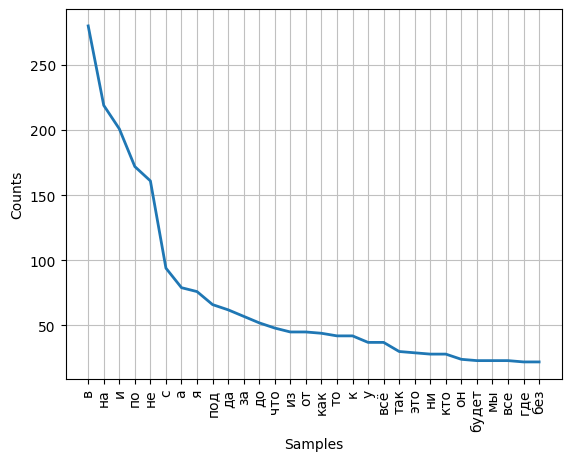

<Axes: xlabel='Samples', ylabel='Counts'>

In [187]:
fdist.plot(30,cumulative=False)

## Удаление стоп-слов

In [188]:
from nltk.corpus import stopwords
russian_stopwords = stopwords.words("russian")
russian_stopwords.extend(['это', 'б', 'к','ко'])
removeTheseStopwords = ['он', 'я', 'все',  'она',  'его',  'ты',  'вы',  'мне', 'ее',  'меня',  'ему',  'быть',  'был',  'него', 'вас', 'вам',  'себя',  'ничего',  'ей',  'они',  'ней',  'мы',  'тебя',   'их',  'была',   'сам',  'себе',  'какой',  'ним',   'здесь',  'один',  'мой',  'были',  'нее',   'всех',  'нас',  'них', 'моя',  'хорошо',  'свою', 'такой' ]
russian_stopwords = [ x for x in russian_stopwords if x not in removeTheseStopwords ]


In [189]:
print(len(russian_stopwords))
#russian_stopwords

114


In [190]:
%%time
text_tokens = [token.strip() for token in text_tokens if token not in russian_stopwords]
type(text_tokens)

CPU times: total: 0 ns
Wall time: 0 ns


list

In [191]:
print(len(text_tokens))

6609


In [192]:
text = nltk.Text(text_tokens)
type(text)

nltk.text.Text

In [193]:
fdist_sw = FreqDist(text)
fdist_sw.most_common(50)

[('я', 76),
 ('всё', 37),
 ('он', 24),
 ('мы', 23),
 ('все', 23),
 ('мне', 18),
 ('ты', 17),
 ('глаза', 16),
 ('нас', 16),
 ('нам', 16),
 ('вода', 15),
 ('дом', 15),
 ('очень', 15),
 ('руки', 14),
 ('утра', 12),
 ('день', 11),
 ('просто', 11),
 ('придёт', 11),
 ('будешь', 10),
 ('туда', 10),
 ('дождь', 10),
 ('ещё', 10),
 ('дым', 10),
 ('небо', 9),
 ('ночь', 9),
 ('белый', 9),
 ('всем', 9),
 ('вниз', 9),
 ('ветер', 9),
 ('страх', 9),
 ('боль', 9),
 ('ноги', 9),
 ('кидай', 9),
 ('двери', 8),
 ('огонь', 8),
 ('край', 8),
 ('слова', 8),
 ('сны', 8),
 ('свет', 8),
 ('отпусти', 8),
 ('голова', 8),
 ('моя', 8),
 ('они', 8),
 ('время', 8),
 ('гори', 8),
 ('каждым', 8),
 ('люди', 7),
 ('солнышко', 7),
 ('снег', 7),
 ('стене', 7)]

## Построение облака слов

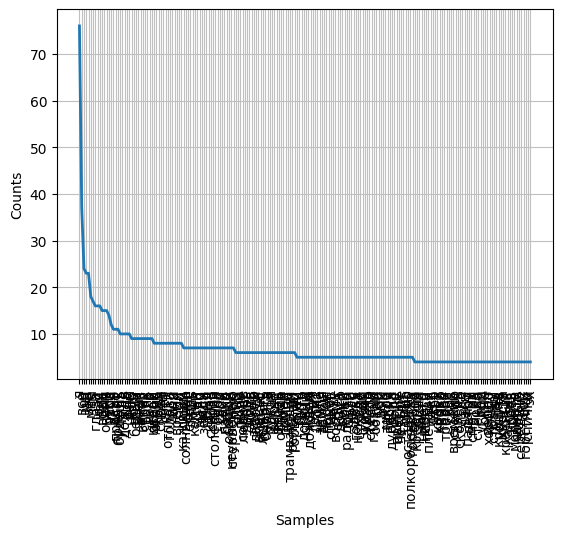

<Axes: xlabel='Samples', ylabel='Counts'>

In [194]:
fdist_sw.plot(200,cumulative=False)

In [195]:
import inspect

if not hasattr(inspect, 'getargspec'):
    inspect.getargspec = inspect.getfullargspec
    
import pymorphy3
morph = pymorphy3.MorphAnalyzer()
morph_tokens = [morph.parse(token) for token in text_tokens if token not in russian_stopwords]
#morph_tokens
# get normal forms for all words first
normal_forms = [morphed[0].normal_form for morphed in morph_tokens]
#parse normal forms again, so we will have simpler classification
morph_tokens2 = [morph.parse(token) for token in normal_forms]
normal_forms_verbs = [morphed[0].normal_form for morphed in morph_tokens2 if {'VERB'} in morphed[0].tag or {'INFN'} in morphed[0].tag ]
nouns = [morphed[0] for morphed in morph_tokens if 'NOUN' in morphed[0].tag]
normal_forms_nouns = [morphed[0].normal_form for morphed in morph_tokens2 if 'NOUN' in morphed[0].tag]
normal_forms_adj = [morphed[0].normal_form for morphed in morph_tokens2 if 'ADJF' in morphed[0].tag]
normal_forms_other = [morphed[0].normal_form for morphed in morph_tokens2 if ('NOUN' not in morphed[0].tag) and ('VERB' not in morphed[0].tag) and ('INFN' not in morphed[0].tag) and ('ADJF' not in morphed[0].tag)]
other = [morphed[0] for morphed in morph_tokens if ('NOUN' not in morphed[0].tag) and ('VERB' not in morphed[0].tag) and ('INFN' not in morphed[0].tag) and ('ADJF' not in morphed[0].tag)]
#other


In [196]:
print(len(normal_forms))
print(len(normal_forms_nouns))
print(len(normal_forms_verbs))
print(len(normal_forms_adj))
print(len(normal_forms_other))

6609
3190
1605
1018
796


In [197]:
fdist_sw = FreqDist(normal_forms_nouns)
fdist_sw.most_common(8)


[('рука', 33),
 ('глаз', 28),
 ('стена', 26),
 ('земля', 26),
 ('дверь', 25),
 ('вода', 24),
 ('голова', 24),
 ('сон', 23)]

In [198]:
fdist_sw = FreqDist(normal_forms_nouns)
fdist_sw.most_common(6)


[('рука', 33),
 ('глаз', 28),
 ('стена', 26),
 ('земля', 26),
 ('дверь', 25),
 ('вода', 24)]

In [199]:
fdist_sw.N()

3190

In [200]:
fdist_sw.B()

1353

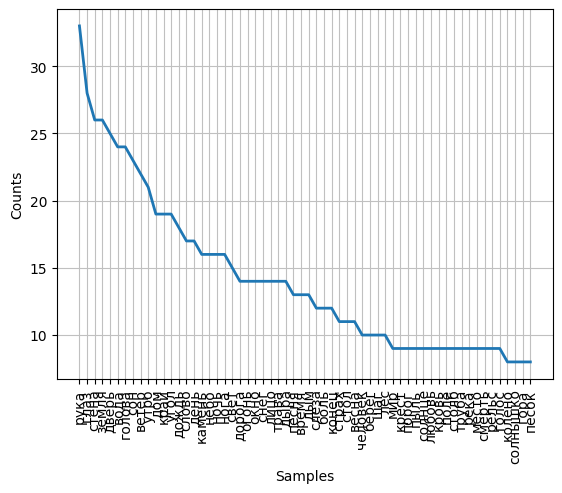

<Axes: xlabel='Samples', ylabel='Counts'>

In [201]:
fdist_sw.plot(60,cumulative=False)

In [202]:
fdist_sw_verbs = FreqDist(normal_forms_verbs)
fdist_sw_verbs.most_common(30)

[('быть', 37),
 ('гореть', 18),
 ('спать', 15),
 ('прийти', 13),
 ('молчать', 13),
 ('стать', 11),
 ('убить', 11),
 ('знать', 10),
 ('хотеть', 10),
 ('смотреть', 10),
 ('отпустить', 10),
 ('увидеть', 9),
 ('кидать', 9),
 ('оставлять', 8),
 ('идти', 8),
 ('встать', 8),
 ('лететь', 8),
 ('жить', 8),
 ('падать', 7),
 ('выйти', 7),
 ('лежать', 7),
 ('бежать', 7),
 ('глядеть', 7),
 ('продать', 7),
 ('пойти', 7),
 ('бросить', 7),
 ('вернуться', 7),
 ('любить', 7),
 ('сказать', 7),
 ('стервенеть', 7)]

In [203]:
fdist_sw_verbs.N()

1605

In [204]:
fdist_sw_verbs.B()

887

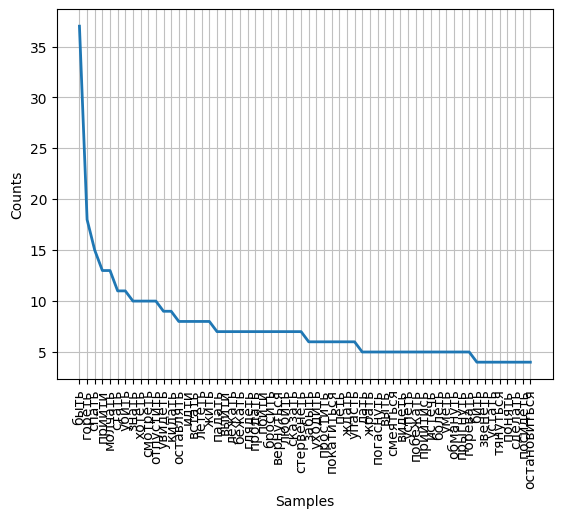

<Axes: xlabel='Samples', ylabel='Counts'>

In [205]:
fdist_sw_verbs.plot(60,cumulative=False)

In [206]:
fdist_sw_adj = FreqDist(normal_forms_adj)
fdist_sw_adj.most_common(20)

[('мой', 30),
 ('весь', 20),
 ('свой', 20),
 ('наш', 18),
 ('такой', 16),
 ('живой', 15),
 ('белый', 14),
 ('чужой', 14),
 ('чёрный', 13),
 ('серый', 13),
 ('красный', 12),
 ('каждый', 12),
 ('синий', 11),
 ('один', 11),
 ('тот', 11),
 ('жёлтый', 10),
 ('первый', 10),
 ('столетний', 9),
 ('сам', 8),
 ('тонкий', 8)]

In [207]:
fdist_sw_adj.N()

1018

In [208]:
fdist_sw_adj.B()

476

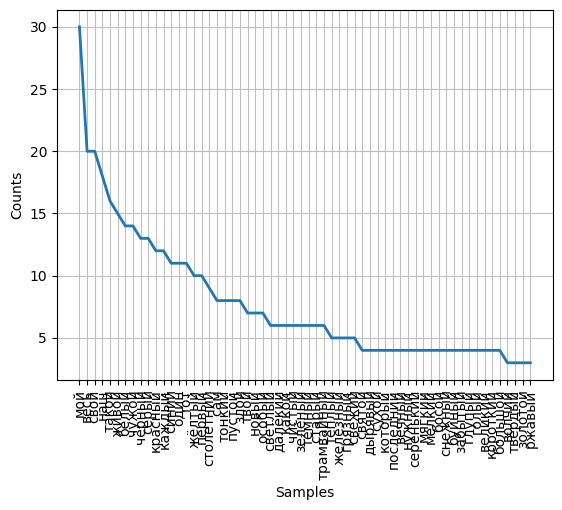

<Axes: xlabel='Samples', ylabel='Counts'>

In [209]:
fdist_sw_adj.plot(60,cumulative=False)

In [210]:
fdist_sw_other = FreqDist(normal_forms_other)
fdist_sw_other.B()

222

In [211]:
fdist_sw_other.most_common(50)

[('я', 106),
 ('всё', 60),
 ('мы', 55),
 ('он', 32),
 ('ты', 27),
 ('они', 17),
 ('очень', 15),
 ('просто', 11),
 ('она', 10),
 ('туда', 10),
 ('ещё', 10),
 ('себя', 9),
 ('вниз', 9),
 ('кто', 9),
 ('вы', 8),
 ('никто', 7),
 ('лишь', 7),
 ('мало', 7),
 ('сквозь', 7),
 ('снова', 7),
 ('неуклонно', 7),
 ('вместе', 6),
 ('выше', 6),
 ('правда', 6),
 ('четыре', 6),
 ('оттуда', 6),
 ('домой', 6),
 ('нету', 5),
 ('восемь', 5),
 ('долго', 5),
 ('петлить', 5),
 ('здесь', 5),
 ('некуда', 5),
 ('два', 5),
 ('ничего', 4),
 ('тихо', 4),
 ('вверх', 4),
 ('сколько', 4),
 ('пока', 4),
 ('хорошо', 4),
 ('вон', 4),
 ('эх', 4),
 ('жарко', 4),
 ('жалко', 4),
 ('вперёд', 4),
 ('ясно', 4),
 ('утром', 3),
 ('скоро', 3),
 ('тяжело', 3),
 ('кругом', 3)]

In [211]:
fdist_sw_other.most_common(50)

[('я', 106),
 ('всё', 60),
 ('мы', 55),
 ('он', 32),
 ('ты', 27),
 ('они', 17),
 ('очень', 15),
 ('просто', 11),
 ('она', 10),
 ('туда', 10),
 ('ещё', 10),
 ('себя', 9),
 ('вниз', 9),
 ('кто', 9),
 ('вы', 8),
 ('никто', 7),
 ('лишь', 7),
 ('мало', 7),
 ('сквозь', 7),
 ('снова', 7),
 ('неуклонно', 7),
 ('вместе', 6),
 ('выше', 6),
 ('правда', 6),
 ('четыре', 6),
 ('оттуда', 6),
 ('домой', 6),
 ('нету', 5),
 ('восемь', 5),
 ('долго', 5),
 ('петлить', 5),
 ('здесь', 5),
 ('некуда', 5),
 ('два', 5),
 ('ничего', 4),
 ('тихо', 4),
 ('вверх', 4),
 ('сколько', 4),
 ('пока', 4),
 ('хорошо', 4),
 ('вон', 4),
 ('эх', 4),
 ('жарко', 4),
 ('жалко', 4),
 ('вперёд', 4),
 ('ясно', 4),
 ('утром', 3),
 ('скоро', 3),
 ('тяжело', 3),
 ('кругом', 3)]

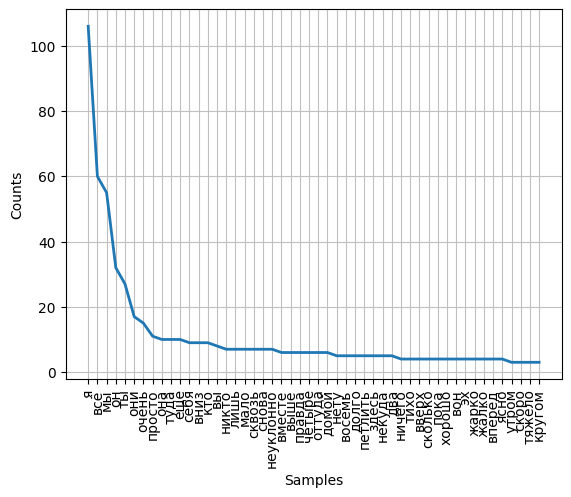

<Axes: xlabel='Samples', ylabel='Counts'>

In [221]:
fdist_sw_other.plot(50,cumulative=False)

In [213]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

In [214]:
text_raw = " ".join(text)
nouns_raw = " ".join(normal_forms_nouns)
verbs_raw = " ".join(normal_forms_verbs)
adjs_raw = " ".join(normal_forms_adj)
other_raw = " ".join(normal_forms_other)

In [215]:
wordcloud = WordCloud().generate(text_raw)
wordcloud_nouns = WordCloud().generate(nouns_raw)
wordcloud_verbs = WordCloud().generate(verbs_raw)
wordcloud_adjs = WordCloud().generate(adjs_raw)
wordcloud_other = WordCloud().generate(other_raw)

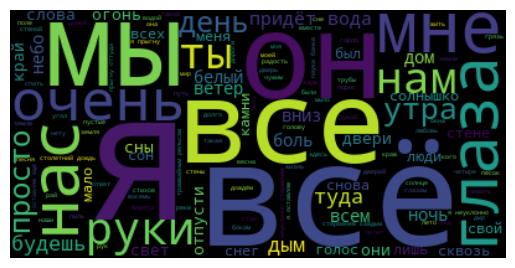

In [216]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

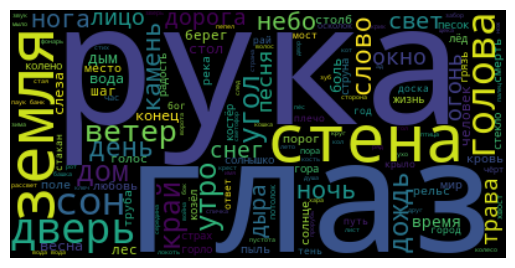

In [217]:
plt.imshow(wordcloud_nouns, interpolation='bilinear')
plt.axis("off")
plt.show()

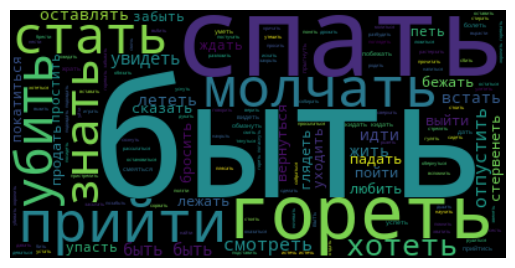

In [218]:
plt.imshow(wordcloud_verbs, interpolation='bilinear')
plt.axis("off")
plt.show()

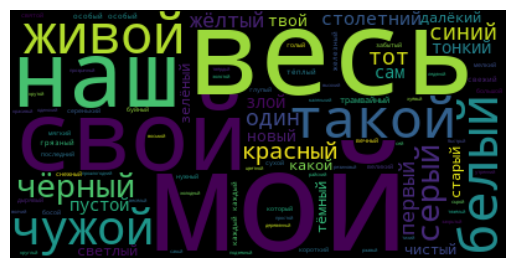

In [219]:
plt.imshow(wordcloud_adjs, interpolation='bilinear')
plt.axis("off")
plt.show()

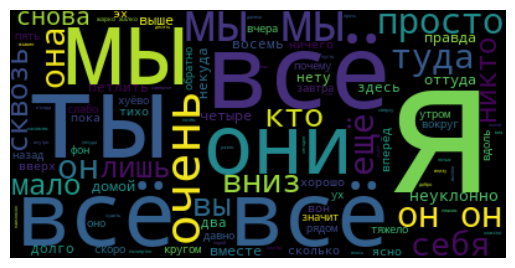

In [220]:
plt.imshow(wordcloud_other, interpolation='bilinear')
plt.axis("off")
plt.show()